# Spike Tutorial -- Part 3

## Analyzing Populations 2

In the last section, we loaded data from a population of neurons and learned to do some single cell statistics and population averages. This time, let's look more specifically at how to summarize stimulus effects across the population, and selecting subsets of neurons.

This is made easy (maybe) by Pandas, so a large focus in this tutorial is making dataframes to contain our population summary data.

First import our favorite modules!

In [1]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle

%matplotlib inline

Let's load our pickled data.

In [2]:
root = '_data'
fn = os.path.join(root,'sessionInfo.pkl')

with open(fn,'rb') as f:
    [order, clustInfo, fs, stimOn, laserOn] = pickle.load(f)

Last time we wrote a function called `makePSTH`, and if we want use that function in this notebook, we'd first need to define it again. One way around that is the save the code for the function to a file. I wrote that function and the `ismember` function from the bonus in tutorial 1 in a file called `lab_tools.py`. Let's import that module and look at the help for our functions:

In [3]:
import lab_tools
help(lab_tools.ismember)
help(lab_tools.makePSTH)

Help on function ismember in module lab_tools:

ismember(A, B)
    replaces values in A with the index of their matches in B.
    
    (ie. if A = [1 1 1 2 2] and B = [2 1], res = ismember(A,B) returns [2 2 2 1 1]
    
    Arguments:
    A -- array to be modified
    B -- modifier index
    
    Returns:
    res -- array with the positional index where B == A replacing values in A where A == B

Help on function makePSTH in module lab_tools:

makePSTH(spikes, triggers, edges)
    makes a PSTH given spikes, event triggers, and temporal bin edges.
    
    *** note: no assumptions of time units here, but the units for each input must match!
    
    Arguments:
    spikes -- absolute spike times
    triggers -- array of event times to zero spike times to
    edges -- array of time bin edges to compute mean spike rates within
    
    Returns:
    psth -- array of n triggers x m edges - 1 containing spike rate in each bin
    raster -- list of spike times zeroed to each trigger, truncated a

Cool, we now have our PSTH function from before, using this module, lets repeat what we did last tutorial:

1. Load the spike and cluster ID data.
2. Make a vector called `edges` that goes from -.1 to 3.1 seconds in steps of .005s. You will use this in the makePSTH function.
3. For each cell, make a PSTH matrix and place it along the 3rd dimension in an array called `allPSTH`. This can take a little while, so print the cell count as you loop through them. (we did this last time)

In [4]:
# load spikes and clusters


# make PSTH


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


Next, lets try adding information to this data frame about the activity of our neurons. First, make a `.copy()` of the `clustInfo` dataframe we loaded at the beginning and rename it `cellData`.

In [5]:
clustInfo.head()

# make a copy

Lets pause and think about what type of data will be useful for our analysis. We have two main conditions: laser and contrast, with two levels each (2x2 design). A good start would be to have the mean firing for each cell in each of the 4 unique conditions. Something else that would be useful is to separate our cells according to their laser responses, so lets also do a test that 

Let's populate new columns in our matrix with the mean firing rate in each unique condition, calling our columns `frLowOff`, `frLowOn`, `frHighOff`, `frHighOn`, and two additional columns for our test statistics, `fVal` and `pVal`.

**Exercise:**
*** note: I found it easier to first create np arrays for each variable, then added those arrays to the columns in the data frame
1. Create indices for all 4 conditions.
2. Loop through each neuron, get the mean firing rate from 0 - 3s for each unique condition.
3. Additionally, use a ranksums test to see whether the neuron has a significant laser response.
4. Add the new data to the columns mentioned above.
5. Once you've made this dataFrame, use a bonferonni correction to determine which neurons are significantly affected by laser, and add that in a new column called `sig`

In [6]:
import scipy.stats

# answer here

If everything went well you should have a dataframe with some useful information about each neuron. Let's start slicing up this dataframe to ask how different aspects of our stimuli affect this population of neurons.

Before we start, let's make a working copy of the original data frame, this will allow us to go back if anything gets messed up. Call the copy `cData`.

In [7]:
cData = cellData.copy()

A good first step for analysis is to remove low-spiking clusters. Remove all the clusters from `cData` that have a spike rate below 1Hz. (note the `spike_rate` column is filled with strings, so you need to split them in order to get out the spike rate)

In [8]:
# answer here

,id,Amplitude,ContamPct,KSLabel,channel,depth,firing_rate,group,n_spikes,frLowOff,frLowOn,frHighOff,frHighOn,fVal,pVal,sig
0,1,488.6,100.0,mua,1,725.0,2.3 spk/s,good,7405,4.898333,0.053333,2.251667,0.076667,-17.285851,6.012724e-67,True
1,2,315.0,100.0,mua,1,725.0,2.5 spk/s,mua,8180,0.250000,8.900000,0.220000,7.950000,17.537392,7.425853e-69,True
2,3,420.4,100.0,mua,1,725.0,1.8 spk/s,mua,5769,2.673333,0.076667,2.141667,0.053333,-17.483187,1.924374e-68,True
7,14,467.6,100.0,mua,21,400.0,1.2 spk/s,mua,3776,1.288333,0.010000,0.940000,0.000000,-15.798340,3.194163e-56,True
8,15,222.6,100.0,mua,21,400.0,3.1 spk/s,mua,9953,2.373333,1.660000,1.665000,1.603333,-2.010825,4.434394e-02,False
11,20,358.9,100.0,mua,5,475.0,2.9 spk/s,mua,9495,4.840000,0.523333,3.846667,0.316667,-17.316326,3.542682e-67,True
14,23,276.6,100.0,mua,6,675.0,3.8 spk/s,mua,12418,2.905000,7.013333,2.788333,7.536667,14.322569,1.581654e-46,True
15,25,355.1,100.0,mua,7,775.0,3.9 spk/s,mua,12749,7.826667,0.036667,5.966667,0.030000,-18.133895,1.721250e-73,True
16,26,639.2,100.0,mua,7,775.0,3.5 spk/s,good,11283,7.550000,0.043333,4.075000,0.076667,-18.114161,2.463996e-73,True
19,31,384.0,100.0,mua,9,275.0,2.2 spk/s,mua,7301,2.133333,0.000000,1.753333,0.003333,-12.550795,3.935372e-36,True


First lets make a scatterplot to summarize the effect of our conditions on firing rate. 

**Try this:**
1. Scatter plot the laser off (x) vs laser on (y) seprately for low and high contrast. Color the points to indicate the contrast condition (red for high, blue for low).
2. Add a unity line from [0 0] to [25 25]
3. Add a legend, axis labels, and title

**Bonus:** the current plot has two dots for each cell, one for low and one for high contrast.  To visualize the contrast change, plot lines between each red and blue dot to indicate cell identity. Make sure the lines are underneath (ie. occluded by) the scatter points (look up zorder).

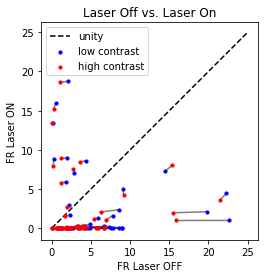

In [9]:
# answer here

In the plot above, you can see that nearly all the neurons are suppressed, with the exception of those above the unity line. If you draw lines identifying each neuron, you can also see that high contrast generally elicits lower firing rates, as most of the red dots are shifted towards zero, relative to the blue dots.

We can visualize the effect of contrast better by changing our axes the response per contrast.

**Try this:**
Recreate the same plot, but scatter low vs. high contrast and color the dots black for no laser and cyan for laser. As usual, add a legend, title, and axis labels.

As a **bonus**, you can also add lines connecting each cell, but set their transparency to .3.

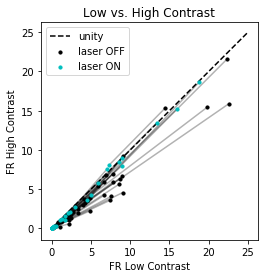

In [10]:
# answer here

Cool, our suspicion that low contrast typically had a greater response than high contrast is confirmed! Interestingly, it looks like this effect is reduced when the laser is on (see how the blue dots move towards the diagonal).

Remember we had a bunch of neurons that were optotagged? We want to remove those from our current analysis to look only at the effect of activating VGAT neurons on excitatory cells.

**Try this:**
1. Filter `cData` to remove cells that are activated by the laser.
2. Replot the previous two graphs with our newly filtered data, but make them subplots this time.

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

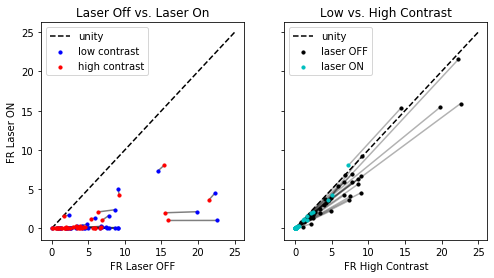

In [11]:
# answer here

So far we've visualized our data, but what about running statistics?

To look at the joint effect of contrast and laser on firing rate, the best test to run is a repeated measures, two-way ANOVA. This is because we are measuring a firing rate for each of our neurons in each condition. Like in Matlab, this is kind of a pain to do... we're going to need to reformat our data and also install a special package to do it.

Most repeated measures ANOVA packages that I could find take pandas dataframes as inputs, where one column is the dependent variable (firing rate), one column is the subject (cell ID), and each other column is an independent variable (for us, laser and contrast). 

While we do have our data in a dataframe already, the formatting is not quite right... we need to reformat it so that each row isn't all the info for a neuron, but contains the mean firing rate for a specific condition, and we need to add labels indicating the condition as well as cell ID for each row. So, because we have 4 conditions, our new data frame should have 4 x nNeurons rows. For example, for the our first neuron, the dataframe should look something like this: 
<img src="cellDF.png">



**Exercise:**
Reformat your data into a pandas dataframe as described above, I called my new dataframe `df`.

There are probably many ways to do this, but I found it easiest to start by making lists called `cell`, `FR`, `laser`, and `contrast`. Then I looped through each neuron and each of the 4 conditions (ie. I used nested loops) to append to these lists. I'll give you some useful variables that you may use in your loop:

In [1]:
colLabels = ['frLowOff','frLowOn','frHighOff','frHighOn']
laserLabels = ['off','on','off','on']
contrastLabels = ['low','low','high','high']

# initialize column lists
cell = []
FR = []
laser = []
contrast = []

# loop here, append info to lists

Ok, that was a pain... now we're ready to do an ANOVA. First we need to install a new package using `pip`, python's package installation tool.

You can either run the following in your terminal:
`pip install pingouin`

Or running the next cell should also work, using a magic (%) command

In [13]:
%pip install pingouin

Note: you may need to restart the kernel to use updated packages.


Now we can import the package and run the ANOVA. If this step doesn't work, you may need to restart your kernel to access the newly installed package.

In [14]:
import pingouin as pg

To run the anova, we'll use the `rm_anova` function in pingouin, you can either look at the help or use google to figure out how to format this command. Basically, we want to test whether the independent variables `laser` and `contrast` affect our dependent variable `FR` over repeated measures in `cell`

In [15]:
# anova


             Source          SS  ddof1  ddof2          MS          F  \
0             laser  323.367561      1     39  323.367561   7.891294   
1          contrast   19.486997      1     39   19.486997  34.728938   
2  laser * contrast   14.160008      1     39   14.160008  22.700337   

          p-unc     p-GG-corr       np2  eps  
0  7.723801e-03  7.723801e-03  0.168289  1.0  
1  7.289705e-07  7.289705e-07  0.471035  1.0  
2  2.625652e-05  2.625652e-05  0.367913  1.0  


Let's look at the results table. If everything went well, you should be seeing really big effects of each condition (laser and contrast) and a significant interaction, by looking at the `p-unc` values. If you're unfamiliar, this basically means that on their own, laser and contrast have a significant effect on firing rate, but also that the effect of laser *changes* the effect of contrast, or vice versa. We can examine this further by running post-hoc tests, look at the methods of `pg` to see what command you would run for this.

In [16]:
# post-hoc tests


           Contrast laser    A     B Paired  Parametric         T   dof  \
0             laser     -  off    on   True        True  2.809145  39.0   
1          contrast     -  low  high   True        True  5.893126  39.0   
2  laser * contrast   off  low  high   True        True  5.401346  39.0   
3  laser * contrast    on  low  high   True        True  2.336413  39.0   

        Tail         p-unc       BF10    hedges  
0  two-sided  7.723801e-03      5.087  0.644024  
1  two-sided  7.289705e-07  2.286e+04  0.230255  
2  two-sided  3.506365e-06   5299.536  0.252981  
3  two-sided  2.470124e-02      1.903  0.028070  


In this table, each row is a post-hoc test. The first two rows are just testing the effects of laser and contrast, so should have the same values as the rm_anova results. Rows 3 and 4 describe the interaction effects: in row 3, when the laser is off, the difference between low and high contrast FR is fairly large and significant (the hedges column shows an effect size of .25, which is decent). On the other hand, row 4 shows that the contrast effect is diminished quite a lot when the laser is on (hedges is .02, so almost no effect despite a significant p-value).

One caveat of the ANOVAs and t-tests we just ran is that they assume the data is normally distributed, when we can look at our scatter plots and see that this is clearly not the case (there is a skew towards lower firing rates). Unfortunately this package doesn't have a method to run a two-way repeated measures non-parametric test (that's a mouthful), but it is relatively easy to run non-parametric post hoc tests. 

Look at the documentation for `pg.pairwise_ttests` to see what option you can use, then run the tests, do the results change? 

In [17]:
# non-parametric post hoc tests

           Contrast laser    A     B Paired  Parametric  W-val       Tail  \
0             laser     -  off    on   True       False  153.0  two-sided   
1          contrast     -  low  high   True       False   16.0  two-sided   
2  laser * contrast   off  low  high   True       False    9.0  two-sided   
3  laser * contrast    on  low  high   True       False  211.5  two-sided   

          p-unc    hedges  
0  5.653968e-04  0.644024  
1  1.228858e-07  0.230255  
2  7.315706e-08  0.252981  
3  3.527948e-02  0.028070  
